## Lab Assignment 5: Text Classification with Deep Learning
**Objective:** \
In this lab assignment, I will use some deep learning models via TFKeras to quantify sentiments on the Yelp Review data and compare their performance.

- Assignment Title: Lab Assignment 5: Text Classification with Deep Learning
- Author Name: Kuan-Hung Liu
- ASU ID: 1230540209
- File Creation Date: 2/13/2024

### Library and date Import
Library and the above offered Input 1 data import, using the first
1000 rows.

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Import dataset
data = pd.read_csv('/content/drive/MyDrive/CIS_509/restaurant_reviews_az.csv', nrows=1000)
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1


### Represent customer review

Represent (i.e., quantify) each customer review000-
dimensional TF-IDF vector.
Use Scikit-learn’s TF-IDF vectorizer to transform my data into numeric vectors.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert sparse matrices to dense arrays for modeling
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [3]:
print(X_train_tfidf_dense)
print(X_test_tfidf_dense)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.10533899]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.09990268 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


#### Design ANN model
Visualize the model. Specifically, use tf.keras.utils.plot_model to show how layers are connected).
- Model architecture: the model will have 4 layers of neurons: input, hidden-layer-
1, hidden-layer-2, and output layers. When defining the input layer, you must set its shape to match the size of the data prepared (i.e., 1000-d). For the first hidden layer (i.e., hidden-layer-1), define its shape to be 5000-d and use the
ReLU as its activation function. For the second hidden layer (i.e., hidden-layer-2),
define its shape to be 2500-d and use the ReLU as its activation function. Lastly,
set up appropriate values for the shape and activation function of the output
layer so that your model can solve a binary classification task (i.e., whatever
shape and activation function appropriate for a binary classification task).
- Model configuration: Use binary cross-entropy loss as your model’s loss function
and stochastic gradient descent as an optimizer. Track accuracy for model
evaluation.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5000)              5005000   
                                                                 
 hidden_layer_2 (Dense)      (None, 2500)              12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 17510001 (66.80 MB)
Trainable params: 17510001 (66.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


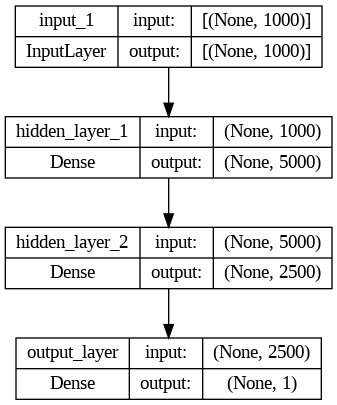

In [1]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # Input layer with shape matching the size of the data (1000-d)
    tf.keras.layers.Input(shape=(1000,)),
    # First hidden layer with 5000 neurons and ReLU activation
    tf.keras.layers.Dense(5000, activation='relu', name='hidden_layer_1'),
    # Second hidden layer with 2500 neurons and ReLU activation
    tf.keras.layers.Dense(2500, activation='relu', name='hidden_layer_2'),
    # Output layer for binary classification with sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print the model summary
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


#### Fit the ANN model
Using a 75/25 split for training and testing (i.e.,
75% for training and 25% for testing). Run your model for 2 epochs (set the batch size
as 8), save the model producing the best result in terms of validation accuracy (use
ModelCheckpoint for this).

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf_dense, y_train, test_size=0.25, random_state=42)

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Fit the model with training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=8, callbacks=[checkpoint])

# Load the best model
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate the best model on testing data
loss, accuracy = best_model.evaluate(X_test_tfidf_dense, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/2
75/75 [==============================] - ETA: 0s - loss: 0.6444 - accuracy: 0.7633
Epoch 1: val_accuracy improved from -inf to 0.76500, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 12s 146ms/step - loss: 0.6444 - accuracy: 0.7633 - val_loss: 0.6083 - val_accuracy: 0.7650
Epoch 2/2
75/75 [==============================] - ETA: 0s - loss: 0.5834 - accuracy: 0.7700
Epoch 2: val_accuracy did not improve from 0.76500
7/7 [==============================] - 0s 35ms/step - loss: 0.6205 - accuracy: 0.7350
Test Accuracy: 0.7350000143051147


### Classification result of Input 2
Classification results for the three customer reviews listed in the
above Input 2. Include reasoning behind why you (or your model) classified each
datapoint as positive, neutral, or negative sentiment (hint: it should be based on the
probability that your model produces for each data point).

**Input 2:**\
(1) “The service is good, but location is hard to find. Sanitation is not very good with old
facilities. Food served tasted extremely fishy, making us difficult to even finish it.”\
(2) “The restaurant is definitely one of my favorites and of my family as well. I was especially
impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer
than 10 minutes to get food served. And of course, the food is absolutely delicious!”\
(3) “I appreciated the friendly staff. The food was good, not amazing. The service was not
prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary.”

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess the input data
input_data = [
    "The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.",
    "The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!",
    "I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary."
]

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_data)

# Preprocess the input data
sequences = tokenizer.texts_to_sequences(input_data)
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Transform the input data using the TF-IDF vectorizer
tfidf_input = tfidf_vectorizer.transform(input_data).toarray()

# Predict the sentiment for each review
predictions = best_model.predict(tfidf_input)

# Interpret the model's predictions
for i, prediction in enumerate(predictions):
    if prediction > 0.7:
        print(f"Review {i+1}: Positive sentiment (Probability: {prediction[0]:.2f})")
    elif prediction < 0.3:
        print(f"Review {i+1}: Negative sentiment (Probability: {prediction[0]:.2f})")
    else:
        print(f"Review {i+1}: Neutral sentiment (Probability: {prediction[0]:.2f})")


1/1 [==============================] - 0s 120ms/step
Review 1: Neutral sentiment (Probability: 0.59)
Review 2: Neutral sentiment (Probability: 0.59)
Review 3: Neutral sentiment (Probability: 0.59)


### Embedding Vector of Input 1
Reload the Input 1 data (the first 1000 rows) and represent (i.e.,
quantify) each customer review with a 50 words * 300 dimension word embedding
vector.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Reload the first 1000 rows of Input 1 data
input_data = data[:1000]

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_data['text'])

# Convert text to sequences of word indices
sequences = tokenizer.texts_to_sequences(input_data['text'])

# Pad sequences to ensure uniform length
max_sequence_length = 50
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Load pre-trained GloVe embeddings (you need to download these embeddings first)
glove_path = '/content/drive/MyDrive/CIS_509/glove.6B.300d.txt'
embedding_dict = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_dict[word] = vector

# Create word embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Generate word embeddings for each review
embedded_reviews = []
for sequence in padded_sequences:
    embedded_sequence = []
    for word_index in sequence:
        embedded_sequence.append(embedding_matrix[word_index])
    embedded_reviews.append(embedded_sequence)

# Convert embedded_reviews to numpy array
embedded_reviews = np.array(embedded_reviews)


In [8]:
embedded_reviews.shape

(1000, 50, 300)

#### Design and fit ANN model
Design and fit an ANN model using the same model architecture and
configurations. Run the model and save the model producing the best result in terms of
validation accuracy. Namely, repeat the above steps 3 and 4.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5000)              5005000   
                                                                 
 hidden_layer_2 (Dense)      (None, 2500)              12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 17510001 (66.80 MB)
Trainable params: 17510001 (66.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


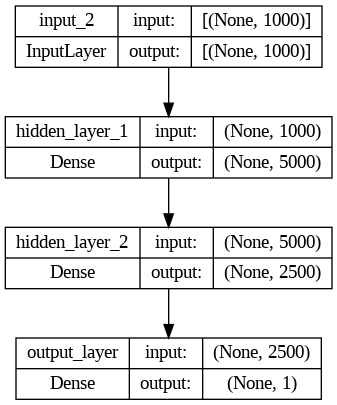

In [9]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # Input layer with shape matching the size of the data (1000-d)
    tf.keras.layers.Input(shape=(1000,)),
    # First hidden layer with 5000 neurons and ReLU activation
    tf.keras.layers.Dense(5000, activation='relu', name='hidden_layer_1'),
    # Second hidden layer with 2500 neurons and ReLU activation
    tf.keras.layers.Dense(2500, activation='relu', name='hidden_layer_2'),
    # Output layer for binary classification with sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print the model summary
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embedded_reviews, data['Sentiment'], test_size=0.25, random_state=42)

# Step 2: Define the architecture of the ANN model
model = Sequential([
    Dense(5000, activation='relu', input_shape=(50, 300)),
    Dense(2500, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Step 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Step 4: Train the model with ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2, batch_size=8, callbacks=[checkpoint])

# Step 5: Load the best model
best_model = tf.keras.models.load_model("best_model.h5")

# Step 6: Evaluate the best model on testing data
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/2
71/71 [==============================] - ETA: 0s - loss: 0.5993 - accuracy: 0.7578
Epoch 1: val_accuracy improved from -inf to 0.78723, saving model to best_model.h5
71/71 [==============================] - 66s 905ms/step - loss: 0.5993 - accuracy: 0.7578 - val_loss: 0.5577 - val_accuracy: 0.7872
Epoch 2/2
71/71 [==============================] - ETA: 0s - loss: 0.5767 - accuracy: 0.7598
Epoch 2: val_accuracy did not improve from 0.78723
8/8 [==============================] - 6s 673ms/step - loss: 0.5879 - accuracy: 0.7480
Test Accuracy: 0.7480000257492065


#### Compare an comment
Compare and comment on your observations on the performance of
ANN models with different word representation methods (i.e., TF-IDF vs. word
embedding).

In TF-TDF, test accuracy is 0.735.\
In word embedding, test accuracy is 0.748.

As a result, **word embedding** has higher test accuracy in this case.

### Design and fit RNN model
Based on the quantified data with word embedding, design and fit an
RNN model using the same model architecture and configurations as in steps 3 and 4.
Run the model and save the model producing the best result in terms of validation
accuracy.

In [6]:
embedded_reviews.shape

(1000, 50, 300)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 hidden_layer_1 (Dense)      (None, 50, 5000)          1505000   
                                                                 
 hidden_layer_2 (Dense)      (None, 50, 2500)          12502500  
                                                                 
 output_layer (Dense)        (None, 50, 1)             2501      
                                                                 
Total params: 14010001 (53.44 MB)
Trainable params: 14010001 (53.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


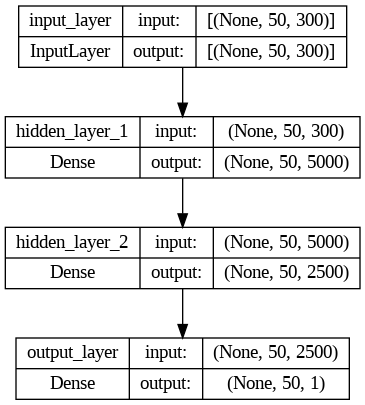

In [18]:
# Define input layer
input_layer = tf.keras.Input(shape=(50, 300), name="input_layer")

# Define first hidden layer with 5000 units and ReLU activation function
hidden_layer_1 = tf.keras.layers.Dense(units=5000, activation="relu", name="hidden_layer_1")(input_layer)

# Define second hidden layer with 2500 units and ReLU activation function
hidden_layer_2 = tf.keras.layers.Dense(units=2500, activation="relu", name="hidden_layer_2")(hidden_layer_1)

# Define output layer with 1 unit and sigmoid activation function for binary classification task
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")(hidden_layer_2)

# Create model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="custom_model")

# Compile model with binary cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Display model summary
model.summary()

# Visualize model architecture
tf.keras.utils.plot_model(model, to_file='model_structure.png', show_shapes=True)


In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Split the data into training and testing sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(embedded_reviews, data['Sentiment'], test_size=0.25, random_state=42)

# Step 2: Train the model on the training data
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=8,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# Step 3: Save the model producing the best result in terms of validation accuracy
best_model = tf.keras.models.load_model('best_model.h5')

# Step 4: Evaluate the best model on testing data
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/2
94/94 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7667
Epoch 1: val_accuracy improved from -inf to 0.74800, saving model to best_model.h5
94/94 [==============================] - 85s 901ms/step - loss: 0.5600 - accuracy: 0.7667 - val_loss: 0.5725 - val_accuracy: 0.7480
Epoch 2/2
94/94 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7667
Epoch 2: val_accuracy did not improve from 0.74800
8/8 [==============================] - 6s 769ms/step - loss: 0.5725 - accuracy: 0.7480
Test Accuracy: 0.7480000257492065


### Design and fit LSTM model
Based on the quantified data with word embedding, design and fit
an LSTM model using the same model architecture and configurations as in steps 3 and 4. Run the model and save the model producing the best result in terms of validation
accuracy.

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 5000)              106020000 
                                                                 
 reshape (Reshape)           (None, 1, 5000)           0         
                                                                 
 lstm_layer_2 (LSTM)         (None, 2500)              75010000  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 181032501 (690.58 MB)
Trainable params: 181032501 (690.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


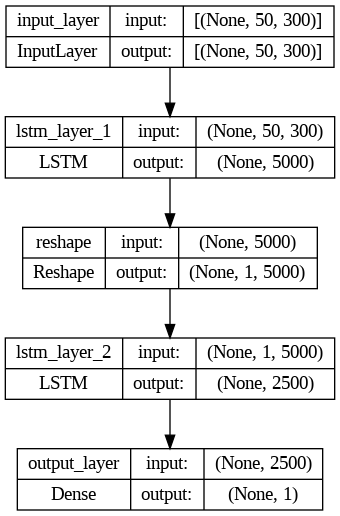

In [10]:
import tensorflow as tf

# Define input layer
input_layer = tf.keras.Input(shape=(50, 300), name="input_layer")

# Define LSTM layer with 5000 units and ReLU activation function
lstm_layer_1 = tf.keras.layers.LSTM(units=5000, activation="relu", name="lstm_layer_1")(input_layer)

# Reshape output of first LSTM layer to match input shape of second LSTM layer
reshaped_layer = tf.keras.layers.Reshape((1, 5000))(lstm_layer_1)

# Define LSTM layer with 2500 units and ReLU activation function
lstm_layer_2 = tf.keras.layers.LSTM(units=2500, activation="relu", name="lstm_layer_2")(reshaped_layer)

# Define output layer with 1 unit and sigmoid activation function for binary classification task
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")(lstm_layer_2)

# Create model
lstm_model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="lstm_model")

# Compile model with binary cross-entropy loss, SGD optimizer, and accuracy metric
lstm_model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Display model summary
lstm_model.summary()

# Visualize model architecture
tf.keras.utils.plot_model(lstm_model, to_file='lstm_model_structure.png', show_shapes=True)


In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Split the data into training and testing sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(embedded_reviews, data['Sentiment'], test_size=0.25, random_state=42)

# Step 2: Train the model on the training data
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = lstm_model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=8,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

# Step 3: Save the model producing the best result in terms of validation accuracy
best_model = tf.keras.lstm_model.load_model('best_model.h5')

# Step 4: Evaluate the best model on testing data
# Evaluate the best model on testing data
test_results = best_model.evaluate(X_test, y_test)

# Extract the test loss and accuracy
test_loss = test_results[0]
test_accuracy = test_results[-1]

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/2
94/94 [==============================] - ETA: 0s - loss: 0.5147 - precision: 0.7667 - recall: 1.0000 - accuracy: 0.7667
Epoch 1: val_accuracy improved from -inf to 0.74800, saving model to best_model.h5
94/94 [==============================] - 13s 136ms/step - loss: 0.5147 - precision: 0.7667 - recall: 1.0000 - accuracy: 0.7667 - val_loss: 0.5361 - val_precision: 0.7480 - val_recall: 1.0000 - val_accuracy: 0.7480
Epoch 2/2
94/94 [==============================] - ETA: 0s - loss: 0.5007 - precision: 0.7725 - recall: 0.9983 - accuracy: 0.7733
Epoch 2: val_accuracy did not improve from 0.74800
8/8 [==============================] - 2s 115ms/step - loss: 0.5361 - precision: 0.7480 - recall: 1.0000 - accuracy: 0.7480
Test Loss: 0.5360811352729797
Test Accuracy: 0.7480000257492065


### Compare and comment
Compare and comment on your observations on the performance of
different deep learning models (i.e., ANN vs. RNN vs. LSTM).

In ANN model, accuracy is 0.735.\
In RNN mdoel, accuracy is 0.748.\
In LSTM model, accuracy is 0.748.

As a result, **RNN and LSTM** model have better performance on accuracy.

### Acknoeledgment
Acknowledge if you have used any GenAI tools in this assignment and
anyone you have worked together with on this assignment.

**I used ChatGPT to create all of my code.**

### Create HTML File

In [3]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/LA5_Liu_KuanHung.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LA5_Liu_KuanHung.ipynb to html
[NbConvertApp] Writing 795437 bytes to /content/drive/MyDrive/Colab Notebooks/LA5_Liu_KuanHung.html
